<a href="https://colab.research.google.com/github/Akshatha2004/Deep-learning/blob/main/DL8%2C9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**8"Stacked Restricted Boltzmann Machines (RBMs) with Logistic Regression for Classification"

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


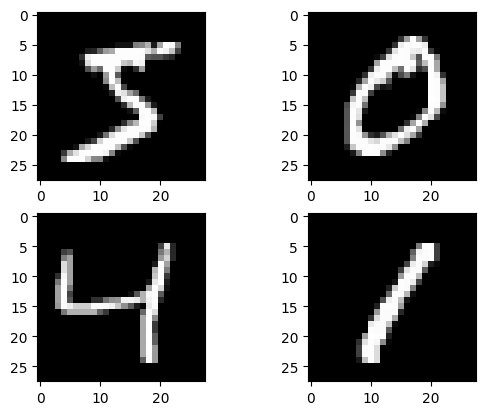

Shape of reshaped training data: (60000, 784)
Shape of reshaped test data: (10000, 784)
Training the model...
Epoch 1/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0668 - val_loss: 0.0192
Epoch 2/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.0176 - val_loss: 0.0134
Evaluating the model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Shape of predicted data: (10000, 784)
Shape of test data: (10000, 784)
Original Test Images


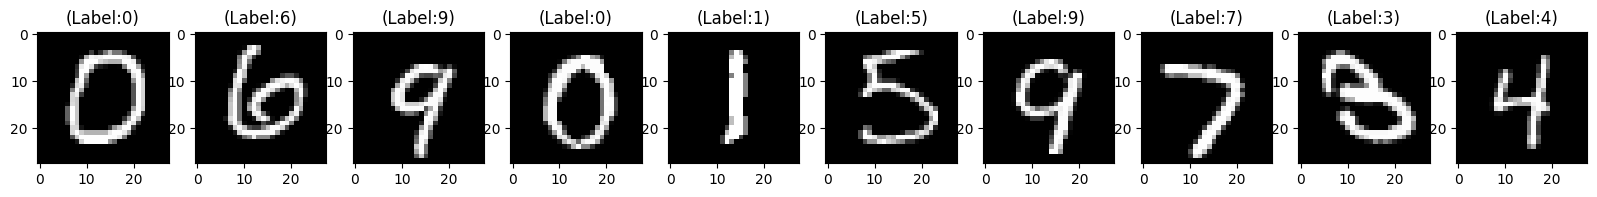

Test images with noise


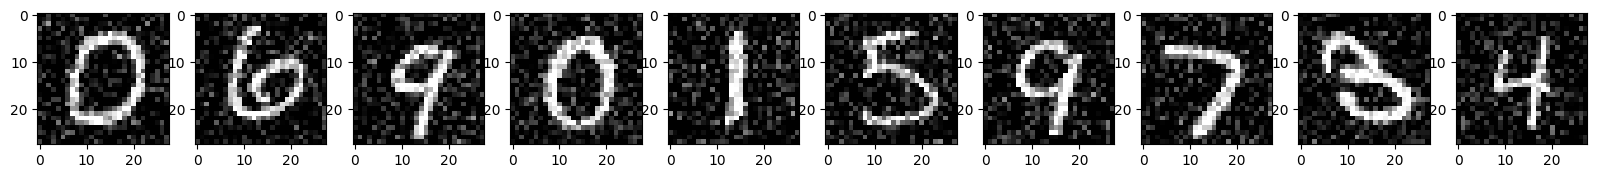

Reconstructed of Noisy Test Images


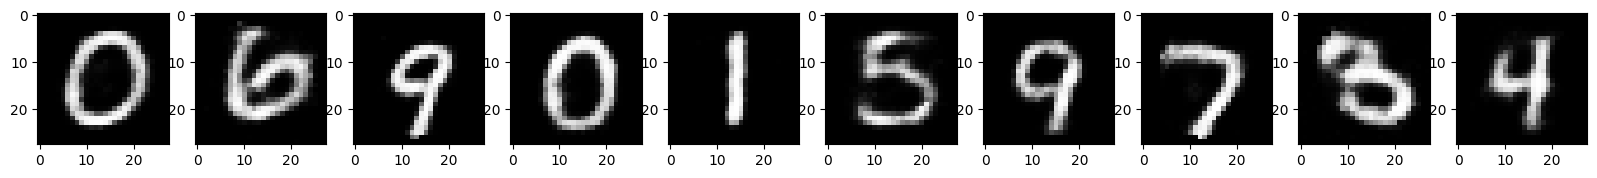

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist  # Import the mnist dataset

# Load the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shapes of the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Display the first 4 images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

# Flatten the images and normalize them
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

# Print the new shape of the data
print(f"Shape of reshaped training data: {X_train.shape}")
print(f"Shape of reshaped test data: {X_test.shape}")

# Add Gaussian noise to the images
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Create the model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
print("Training the model...")
model.fit(X_train_noisy, X_train, validation_data=(X_test_noisy, X_test), epochs=2, batch_size=200)

# Evaluate the model
print("Evaluating the model...")
pred = model.predict(X_test_noisy)

# Print shapes of predicted and test data
print(f"Shape of predicted data: {pred.shape}")
print(f"Shape of test data: {X_test.shape}")

# Reshape the data back to image format for visualization
X_test = np.reshape(X_test, (10000, 28, 28)) * 255
pred = np.reshape(pred, (10000, 28, 28)) * 255
X_test_noisy = np.reshape(X_test_noisy, (-1, 28, 28)) * 255

# Plot original test images
print("Original Test Images")
plt.figure(figsize=(20, 4))
for i in range(10, 20):
    plt.subplot(2, 10, i - 10 + 1)
    plt.imshow(X_test[i], cmap='gray')
    curr_lbl = y_test[i]
    plt.title(f"(Label:{curr_lbl})")
plt.show()

# Plot noisy test images
plt.figure(figsize=(20, 4))
print("Test images with noise")
for i in range(10, 20):
    plt.subplot(2, 10, i - 10 + 1)
    plt.imshow(X_test_noisy[i, :, :], cmap='gray')
plt.show()

# Plot denoised (reconstructed) images
plt.figure(figsize=(20, 4))
print("Reconstructed of Noisy Test Images")
for i in range(10, 20):
    plt.subplot(2, 10, i - 10 + 1)
    plt.imshow(pred[i, :, :], cmap='gray')
plt.show()


**"9 Training and Evaluating a Stacked RBM Model with Logistic Regression on a Synthetic Dataset"**

In [8]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Generate synthetic dataset
def generate_data(samples=1000,features=50):
  np.random.seed(42)
  X=np.random.rand(samples,features)>0.5
  y=(np.sum(X,axis=1)>features/2).astype(int)
  return X,y

#Train stacked RBMs
class StackedRBMs:
  def __init__(self,rbm_layers,rbm_learning_rate=0.01,rbm_n_iter=10):
    self.rbms=[BernoulliRBM(n_components=n_components,
                            learning_rate=rbm_learning_rate,n_iter=rbm_n_iter)
    for n_components in rbm_layers]
    self.logistic_regression=LogisticRegression()

  def pretrain(self,X):
    print("Starting unsupervised pretraining with RBMs..")
    current_input=X
    for idx,rbm in enumerate(self.rbms):
      print(f"Training RBM {idx+1}/{len(self.rbms)}...")
      rbm.fit(current_input)
      current_input=rbm.transform(current_input)

  def fine_tune(self,X,y):
    print("Starting supervised fine-tuning with logistic regression...")
    #Transform input through all rbms
    for rbm in self.rbms:
      X=rbm.transform(X)
    self.logistic_regression.fit(X,y)

  def predict(self,X):
    #Transform input through all rbms
    for rbm in self.rbms:
      X=rbm.transform(X)
    return self.logistic_regression.predict(X)

#Main execution
if __name__ == "__main__":
  #Generate data
  X,y=generate_data()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

  #Define the rbm stacking parameter
  rbm_layers=[128,64]

  #Initialize the stacked RBMs
  stacked_rbm=StackedRBMs(rbm_layers=rbm_layers,rbm_learning_rate=0.05,rbm_n_iter=15)

  #pretrining (unsupervised)
  stacked_rbm.pretrain(X_train)

  #Fine_tuning(supervised)
  stacked_rbm.fine_tune(X_train,y_train)

  #Evaluated model
  y_pred=stacked_rbm.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Test Accuracy: {accuracy *100:.2f}%")

Starting unsupervised pretraining with RBMs..
Training RBM 1/2...
Training RBM 2/2...
Starting supervised fine-tuning with logistic regression...
Test Accuracy: 85.00%
